# LAB3: Algorytmy grafowe – minimalne drzewo rozpinające grafu

## Zadanie 1

Implementacja algorytmu Dijksry-Prima poszukiwania minimalnego drzewa rozpinającego graf, czyli zbioru takich krawędzi, którego suma wag jest najmniejsza:

In [69]:
from typing import List, Dict, Tuple, Set
import networkx as nx
import matplotlib.pyplot as plt

#definicje potrzebnych aliasów
edge = Tuple[int, int]
graph = Dict[int, List]
inf = float('inf')

def DPA(G: graph, a: Dict, s: int) -> Tuple[Set[edge], int]:
    """
    Algorytm zwracający najmniejsze drzewo rozpinające graf "G", o zadanej tablicy 2D wag "a", i początkowym wierzchołku "s".
    Alogrytm zwraca kortkę, zawierającą krawędzie MST oraz ich sumę.
    """
    size_graph = len(G) #inicjalziacja 
    beta = [inf for _ in range(size_graph)]
    alfa = [0 for _ in range(size_graph)]
    sum = 0 #inicjalizacja zmiennych: suma krawędzi
    A = set()   #inicjalizacja zmiennych: zbiór krawędzi MST
    Q = list(range(1,size_graph+1))  #inicjalizacja zmiennych: zbiór wierzchołków nienależących do MST
    Q.remove(s) #usunięcie ze zbioru wierzchołków nienależących do MST
    beta[s-1] = 0   #ustawienie wagi początkowego wierzchołka
    u_prev = s #ustawienie s jako poprzedni wierzchołek
    while Q:    #iteracja po wierzchołkach nienależących do MST 
        for u_q in Q: #iteracja po kazdym wierzchołku należącym do Q
            for u in G[u_prev]: #iteracja po kazdym wierzchołku należącym sąsiada wierzchołka u
                if a[u-1][u_prev-1] < beta[u-1]: #jeżeli waga krawędzi u->u* jest mniejsza niż ta w tablicy beta:
                    alfa[u-1] = u_prev  #poprzednik wierzchołka u ustawiany jest na u*
                    beta[u-1] = a[u-1][u_prev-1] #waga krawędzi u->u* jest ustawiana na tą z tablicy a    
        prev_min = inf #usawienie zmiennej minimum do poszukiwania minimalnej wagi w liscie beta, innej od 0 (wierzchołek startowy)
        for u in Q:     #poszukiwanie minimum 
            if beta[u-1] < prev_min: #jeżeli wartość wagi dla wierzchołka u bedzie mniejsza niz poprzednia znaleziona
                prev_min = beta[u-1] #zamieniamy poprzednie minimum na nowe
                u_prev = u #ustawiamy poprzedni wierzchołek na u
        Q.remove(u_prev) #usuwamy poprzedni wierzchołek z listy wierzchołków nienależących do MST
        
        A.add((alfa[u_prev-1], u_prev)) #dodajemy krawędź u->u* do zbioru MST
        sum += a[alfa[u_prev-1]-1][u_prev-1] #dodajemy wagę krawędzi u->u* do sumy MST
    return (A, sum) #zwrot wartości wyżej wspomnianych            

## Zadanie 2

W przypadku działania tego algorytmu znaczące mogą być spójność i skierowanie grafu. Ogólnie nie da się wyznaczyć MST dla grafu niespójnego, gdyż nie będzie to jedno drzewo rozpinające, a kilka dla każdej osobnej i spójnej części grafu. W przypadku tego algorytmu, zostanie zwrócony błąd, gdyż po przeszukaniu i dodaniu krawędzi z jednej częśći grafu, nie zostanie przypisany nowy wierzchołek z innej niespójnej części, więc w kolejnej iteracji będzie podjęta próba ponownego usunięcia go. Ten problem jest omijany prez algorym Kruskala, który wyznaczy np. dwa osobne drzewa rozpinające, lecz tylko jedan sumę krawędzi. Podobnie ma się sprawa kwestii nieskierowania grafu, gdyż jeżeli wszytskie krawędzie będą istnieć w obie strony z wagami to problemu nie ma, ale w momencie braku jednej z nich problem jest taki sam jak wyżej wspomniany z grafem niespójnym.

Oto wynik wywołania algorytmu dla przykładowego grafu spójnego i nieskierowanego o 10 wierzchołkach i 20 krawędziach:

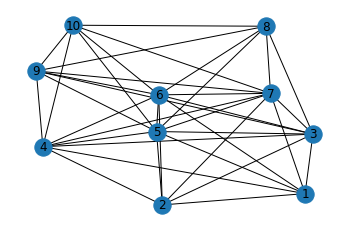

Krawędzie MST to: {(3, 7), (7, 10), (1, 4), (7, 9), (1, 6), (3, 2), (2, 5), (1, 3), (7, 8)}
A ich łączna suma to: 12


In [68]:
def info_graph(G, title=''):
    plt.figure
    plt.title(title)
    GG = nx.Graph(G)
    nx.draw(GG, with_labels=True)
    plt.show()


G = {
    1: [2, 3, 4, 5, 6, 7],
2: [1, 3, 4, 5, 6, 7],
3: [1, 2, 4, 5, 6, 7, 8, 9],
4: [1, 2, 3, 5, 6, 7, 9, 10],
5: [1, 2, 3, 4, 6, 7, 8, 9, 10],
6: [1, 2, 3, 4, 5, 7, 8, 9, 10],
7: [1, 2, 3, 4, 5, 6, 8, 9, 10],
8: [3, 5, 6, 7, 9, 10],
9: [3, 4, 5, 6, 7, 8, 10],
10: [4, 5, 6, 7, 8, 9],
}

a = [    [inf, 2, 1, 1, 3, 1, 5, float('inf'), float('inf'), float('inf')],
    [2, inf, 1, 1, 1, 1, 5, float('inf'), float('inf'), float('inf')],
    [1, 1, inf, 2, 2, 1, 3, 3, 3, float('inf')],
    [1, 1, 2, inf, 1, 1, 4,inf,4,4],
    [3, 1, 2, 1, inf, 1, 5, 5, 5, 5],
    [1, 1, 1, 1, 1, inf, 6, 6, 6, 6],
    [5, 5, 3, 4, 5, float('inf'), inf, 2, 1, 1],
    [float('inf'), float('inf'), 3, inf, 5, 6, 2, inf, 2, 2],
    [float('inf'), float('inf'), 3, 4, 5, 6, 1, 2, inf, 1],
    [float('inf'), float('inf'), float('inf'), 4, 5, 6, 1, 2, 1, inf]
]
info_graph(G)

MST, sum = DPA(G, a, 1)
print(f'Krawędzie MST to: {MST}\nA ich łączna suma to: {sum}')

Przykłady wywołania dla grafów niespełniających kryteium:
* Graf niespójny

In [ ]:
G = {
1: [2, 3, 4, 5, 6, 7],
2: [1, 3, 4, 5, 6, 7],
3: [1, 2, 4, 5, 6, 7, 8],
4: [1, 2, 3, 5, 6, 7],
5: [1, 2, 3, 4, 6, 7, 8],
6: [1, 2, 3, 4, 5, 7, 8],
7: [1, 2, 3, 4, 5, 6, 8],
8: [3, 5, 6, 7],
9: [10],
10: [9],
}

a = [    
    [inf, 2, 1, 1, 3, 1, 5, float('inf'), float('inf'), float('inf')],
    [2, inf, 1, 1, 1, 1, 5, float('inf'), float('inf'), float('inf')],
    [1, 1, inf, 2, 2, 1, 3, 3, float('inf'), float('inf')],
    [1, 1, 2, inf, 1, 1, 4,inf,float('inf'),float('inf')],
    [3, 1, 2, 1, inf, 1, 5, 5, float('inf'), float('inf')],
    [1, 1, 1, 1, 1, inf, 6, 6, float('inf'), float('inf')],
    [5, 5, 3, 4, 5, float('inf'), inf, 2, float('inf'), float('inf')],
    [float('inf'), float('inf'), 3, inf, 5, 6, 2, inf, float('inf'), float('inf')],
    [float('inf'), float('inf'), float('inf'),float('inf'),float('inf'), float('inf'), float('inf'), float('inf'), inf, 1],
    [float('inf'), float('inf'), float('inf'), float('inf'), float('inf'),float('inf'), float('inf'), float('inf'), 1, inf]
]

MST, sum = DPA(G, a, 1)
print(f'Krawędzie MST to: {MST}\nA ich łączna suma to: {sum}')

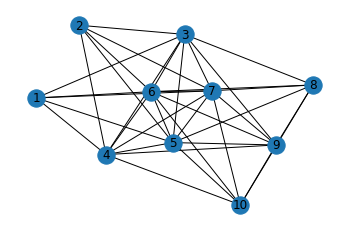

In [67]:
info_graph(G)

* Graf skierowany

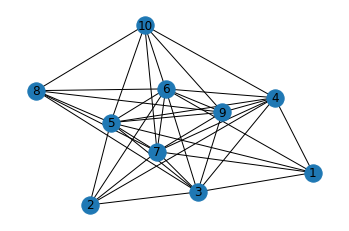

Krawędzie MST to: {(3, 8), (8, 7), (8, 10), (4, 2), (1, 4), (2, 3), (7, 9), (4, 5), (1, 6)}
A ich łączna suma to: 13


In [66]:
G = {
1: [4, 5, 6, 7],
2: [3, 4, 5, 6, 7],
3: [1, 2, 4, 5, 6, 8, 9],
4: [1, 2, 3, 5, 6, 7, 9, 10],
5: [1, 2, 3, 4, 6, 7, 8, 9, 10],
6: [1, 2, 3, 4, 5, 7, 8, 9, 10],
7: [1, 2, 3, 4, 5, 6, 8, 9],
8: [3, 5, 6, 7, 9, 10],
9: [3, 4, 5, 6, 7, 8, 10],
10: [4, 5, 6, 7, 8],
}

a = [    
    [inf, inf, inf, 1, 3, 1, 5, float('inf'), float('inf'), float('inf')],
    [inf, inf, 1, 1, 1, 1, 5, float('inf'), float('inf'), float('inf')],
    [1, 1, inf, 2, 2, 1, 3, 3, 3, float('inf')],
    [1, 1, 2, inf, 1, 1, 4,inf,4,4],
    [3, 1, 2, 1, inf, 1, 5, 5, 5, 5],
    [1, 1, 1, 1, 1, inf, 6, 6, 6, 6],
    [5, 5, inf, 4, 5, float('inf'), inf, 2, 1, inf],
    [float('inf'), float('inf'), 3, inf, 5, 6, 2, inf, 2, 2],
    [float('inf'), float('inf'), 3, 4, 5, 6, 1, 2, inf, 1],
    [float('inf'), float('inf'), float('inf'), 4, 5, 6, 1, 2, inf, inf]
]
info_graph(G)

MST, sum = DPA(G, a, 1)
print(f'Krawędzie MST to: {MST}\nA ich łączna suma to: {sum}')

W przypadku dużej liczby krawędzi problem opisany wyżej się nie pojawia, ale gdy zmniejszymy liczbę:

In [ ]:
graph = {
    1: [3],
    2: [1, 5],
    3: [1, 4, 6],
    4: [3],
    5: [2, 7],
    6: [3],
    7: [5]
}

a = [
    [inf,inf,3,inf,inf,inf,inf],
    [2,inf,inf,inf,3,inf,inf],
    [1,inf,inf,3,inf,3,inf],
    [inf,inf,2,inf,inf,inf,inf],
    [inf,1,inf,inf,inf,inf,9],
    [inf,inf,3,inf,inf,inf,inf],
    [inf,inf,inf,inf,2,inf,inf],
]

MST, sum = DPA(G, a, 1)
print(f'Krawędzie MST to: {MST}\nA ich łączna suma to: {sum}')

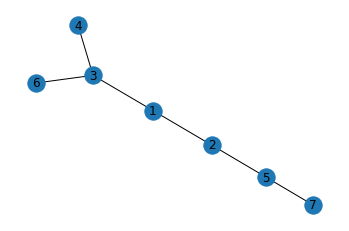

In [65]:
info_graph(graph)

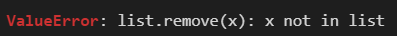

## Zadanie 3

* Alorytm Kruskala jest kolejnym algorytmem do poszukiwania MST. Rozpoczyna od posortowania funckji wag i krawędzi, w niemalejącej kolejności. Wybiera za każdym razem krawędź o najmniejszej wadze, z tym że wybrana krawedź zostaje sprawdzona pod kątem potencjalnego utworzenia cyklu w MST i wtedy ewentualnie jest odrzucana. Algorytm kończy działanie w momencie gdy ilość krawędzi jest równa V-1, gdzie V to liczba wierzchołków
* W przypadku najbardziej optymalnego podejścia z zastosowaniem sterty minimalnej wartości, algorytm ma złożonośc E*logV, spowodowaną najbardziej kosztowna operacją jaką jest sortowanie całej struktury krawędzi względem wag.

## Zadanie 4
* za pomocą wag w grafie mogą być oznaczone przepustowości sieci internetowej, odległości między rzeczywistymi punktami, miastami, ilość materiałów 
* zamiast wagi w formie liczby całkowitej, do rozwiązywania problemów rzeczywistych można użyć np struktury danych(która umożliwia operacje porównywania), w której byłyby zawarte informacje np. nie tylko o odległosci między miastami, ale także o nachyleniu danej drogi, średnim spalaniu paliwa na drodze, lub też w przypadku innych instalacji infrastruktury, także oprócz odległości, informacje o łatwości układania np okablowania.
* w takim przypadku należy odpowiedno zaimplementować metodę odpowiedzialną za porówywanie już nie wag a całych struktur informacji, np. jako średnią ważoną wcześniej znormalizownaych informacji.